In [9]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches
import mplstereonet
import skimage.exposure
import harmonica as hm
import verde as vd

import zipfile
import os

import time
import warnings
import rich.progress

In [10]:
fig_dir = pathlib.Path("..") / "paper" / "figures"

/tmp/ipykernel_448164/1109704071.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


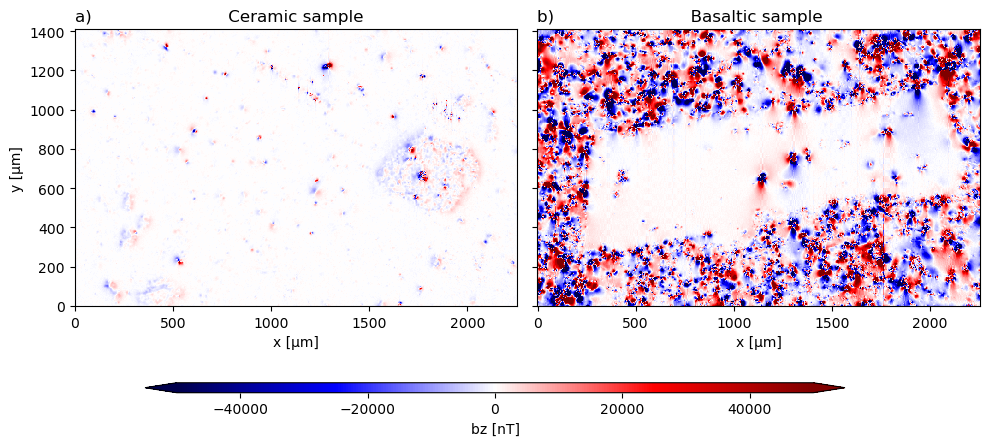

In [12]:
from basalt_sample import micromag as mg

# Lista com os nomes das pastas contendo os arquivos .mat
folders = ["ceramic_sample/real-data", 
           "basalt_sample/real-data"]
titles = ["a)                          Ceramic sample", 
          "b)                          Basaltic sample"]

# Criar figura para os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
images = []

res = 2.35  # Resolução espacial em µm/pixel

for i, (folder, title) in enumerate(zip(folders, titles)):
    # Procurar arquivos .mat dentro da pasta
    mat_files = [f for f in os.listdir(folder) if f.endswith(".mat")]
    
    if mat_files:
        # Alterando os índices para pegar o 7º e o 5º arquivo
        if i == 0:  # Para o primeiro caso (ceramic_sample)
            mat_path = pathlib.Path(folder) / mat_files[7]  
        elif i == 1:  # Para o segundo caso (basalt_sample)
            mat_path = pathlib.Path(folder) / mat_files[5]  
        
        # Carregar o arquivo .mat como um xarray.Dataset
        ds = mg.load_qdm(mat_path)
        
        # Criar coordenadas espaciais com base na resolução
        x = np.arange(ds.bz.shape[1]) * res  # Coordenadas x em µm
        y = np.arange(ds.bz.shape[0]) * res  # Coordenadas y em µm
        
        # Plotar pcolormesh com coordenadas ajustadas
        im = axes[i].pcolormesh(x, y, ds.bz, cmap="seismic", vmax=50000, vmin=-50000)
        axes[i].set_title(title, loc='left')
        images.append(im)

        # Definir aspecto igual
        axes[i].set_aspect('equal')

# Adicionar colorbar compartilhado
if images:
    cbar = fig.colorbar(images[0], ax=axes, extend='both', 
                        orientation='horizontal', fraction=0.09, pad=0.1,
                        cax=fig.add_axes([0.15, 0.05, 0.7, 0.02]))
    cbar.set_label("bz [nT]")

# Definir rótulos dos eixos
axes[0].set_ylabel('y [µm]')
for ax in axes:
    ax.set_xlabel('x [µm]')

# Ajustar layout
plt.tight_layout()

# Salvar a figura
fig.savefig(fig_dir / "real-data-maps.png", dpi=300, facecolor='w', bbox_inches='tight')

# Exibir a figura
plt.show()
